<a href="https://colab.research.google.com/github/kmonroyzm/kmonroyzm/blob/main/ggplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ggplot2


In [ ]:
options(repr.plot.width = 9, repr.plot.height = 5)
rm(list=ls())
data("iris")
library(ggplot2)


In [ ]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Warning message:
“Using size for a discrete variable is not advised.”

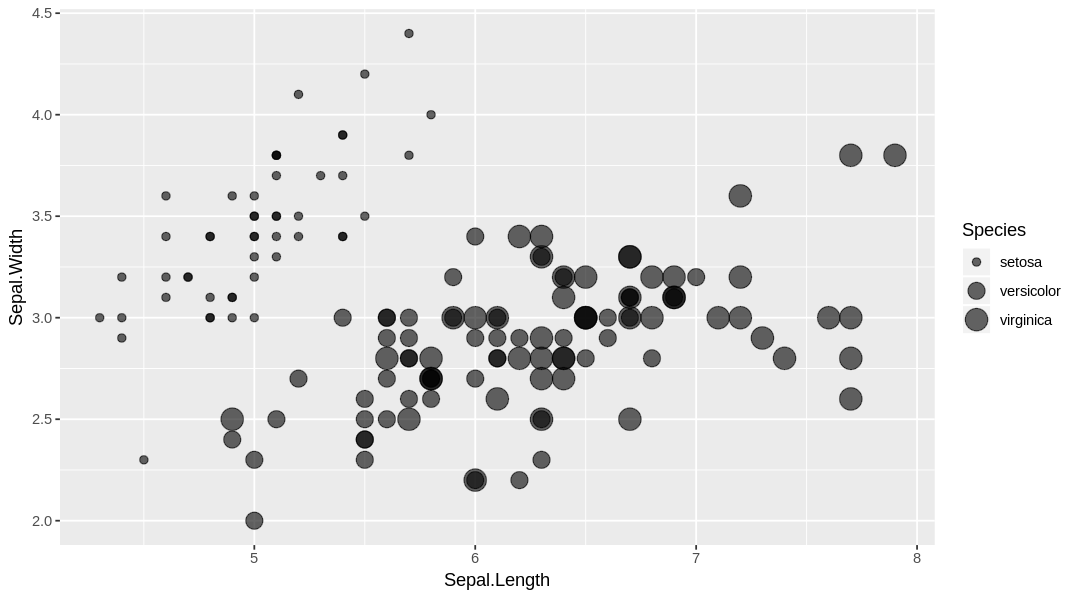

In [ ]:
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width, size=Species)) +
  geom_point(alpha=0.6)

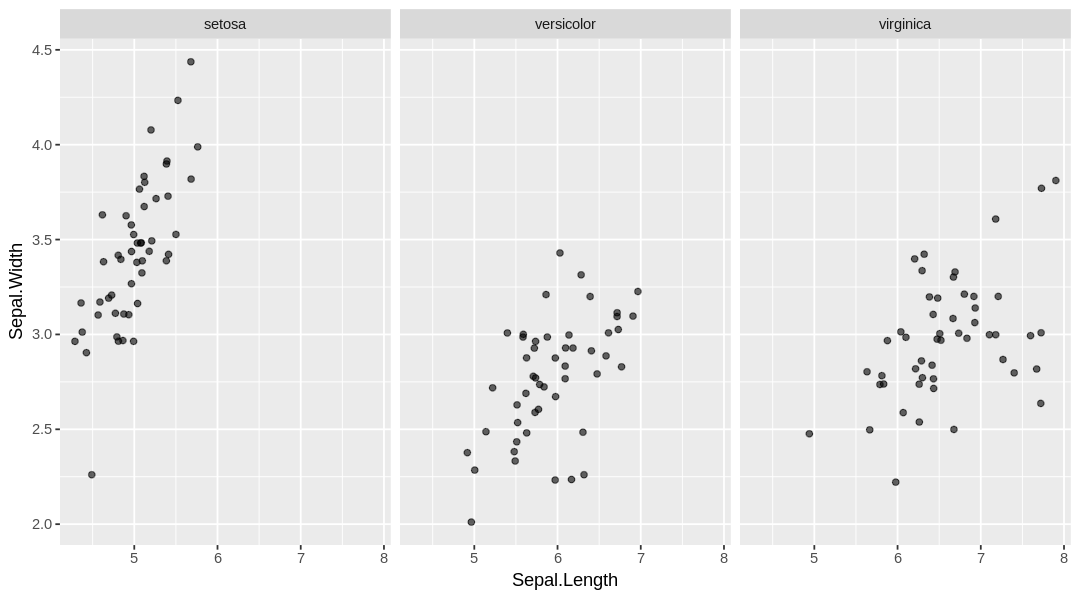

In [ ]:
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width)) +
  geom_jitter(alpha=0.6)+
  facet_wrap(Species~.)

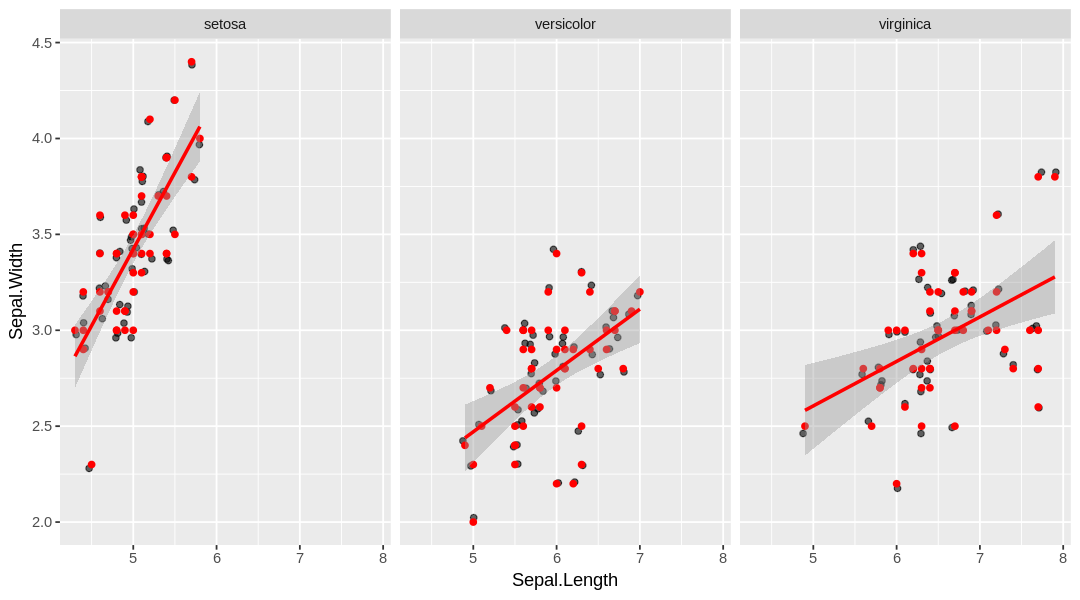

In [ ]:
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width)) +
  geom_jitter(alpha=0.6)+
  geom_point(color="red")+
  facet_grid(.~Species)+
  stat_smooth(method = "lm", col="red")

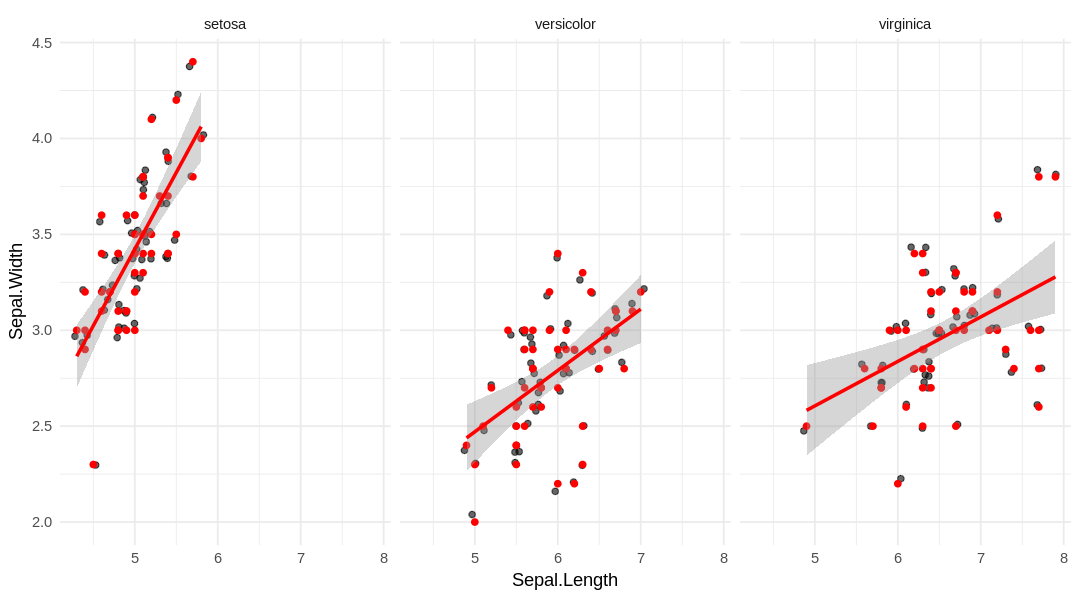

In [ ]:
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width)) +
  geom_jitter(alpha=0.6)+
  geom_point(color="red")+
  facet_grid(.~Species)+
  stat_smooth(method = "lm", col="red")+
  theme_minimal()

In [ ]:
data("economics")
head(economics)

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<int>,<dbl>,<dbl>,<int>
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945
1967-09-01,516.3,199113,11.7,4.6,2958
1967-10-01,512.9,199311,12.5,4.9,3143
1967-11-01,518.1,199498,12.5,4.7,3066
1967-12-01,525.8,199657,12.1,4.8,3018


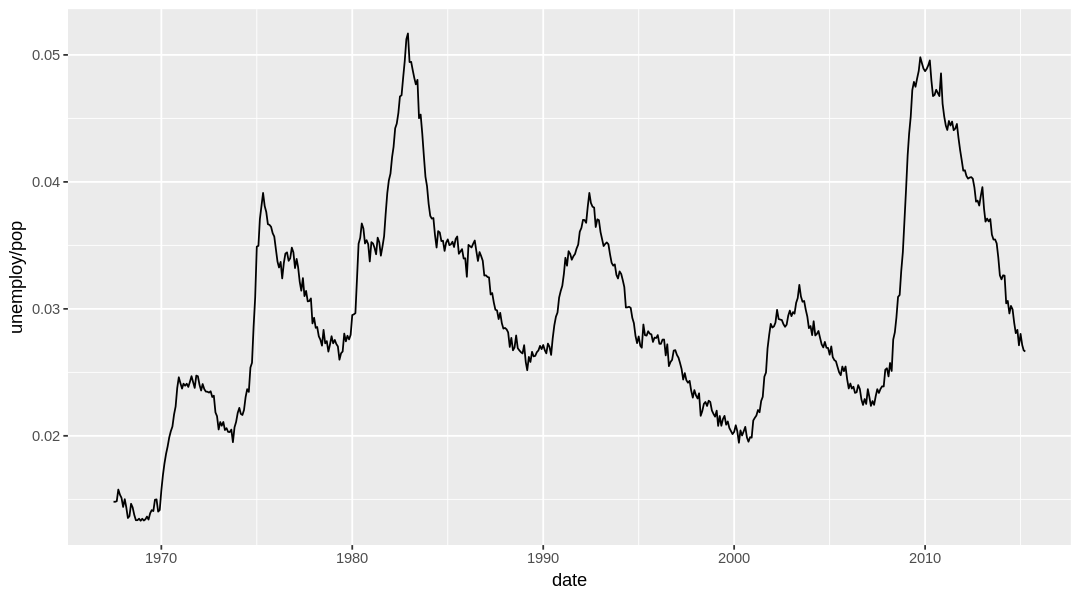

In [ ]:
ggplot(economics, aes(x = date, y = unemploy/pop)) +
  geom_line()

In [ ]:
recess <- data.frame(inicio=as.Date(c("1969-12-01","1973-11-01","1980-01-01",
                                      "1981-07-01","1990-07-01","2001-03-01")),
                     fin=as.Date(c("1970-11-01","1975-03-01","1980-07-01",
                                   "1982-11-01","1991-03-01","2001-11-01")))

recess

inicio,fin
<date>,<date>
1969-12-01,1970-11-01
1973-11-01,1975-03-01
1980-01-01,1980-07-01
1981-07-01,1982-11-01
1990-07-01,1991-03-01
2001-03-01,2001-11-01


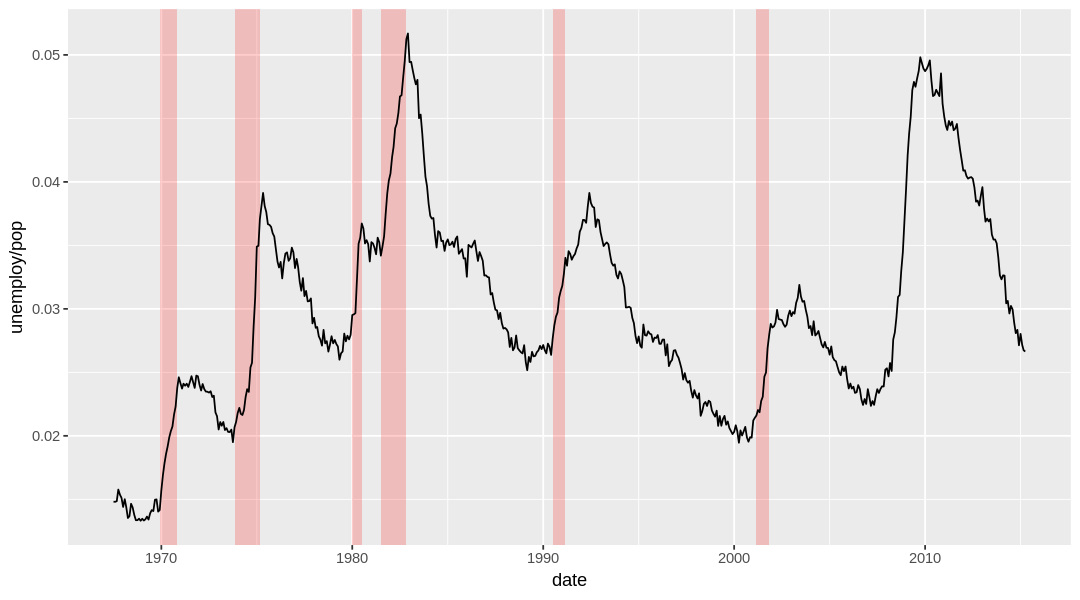

In [ ]:
ggplot(economics, aes(x = date, y = unemploy/pop)) +
  geom_rect(data = recess,
            aes(xmin = inicio, xmax = fin, ymin = -Inf, ymax = +Inf),
            inherit.aes = FALSE, fill = "red", alpha = 0.2) +
  geom_line()

X,Country,HDI.Rank,HDI,CPI,Region
<int>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Afghanistan,172,0.398,1.5,Asia Pacific
2,Albania,70,0.739,3.1,East EU Cemt Asia
3,Algeria,96,0.698,2.9,MENA
4,Angola,148,0.486,2.0,SSA
5,Argentina,45,0.797,3.0,Americas
6,Armenia,86,0.716,2.6,East EU Cemt Asia


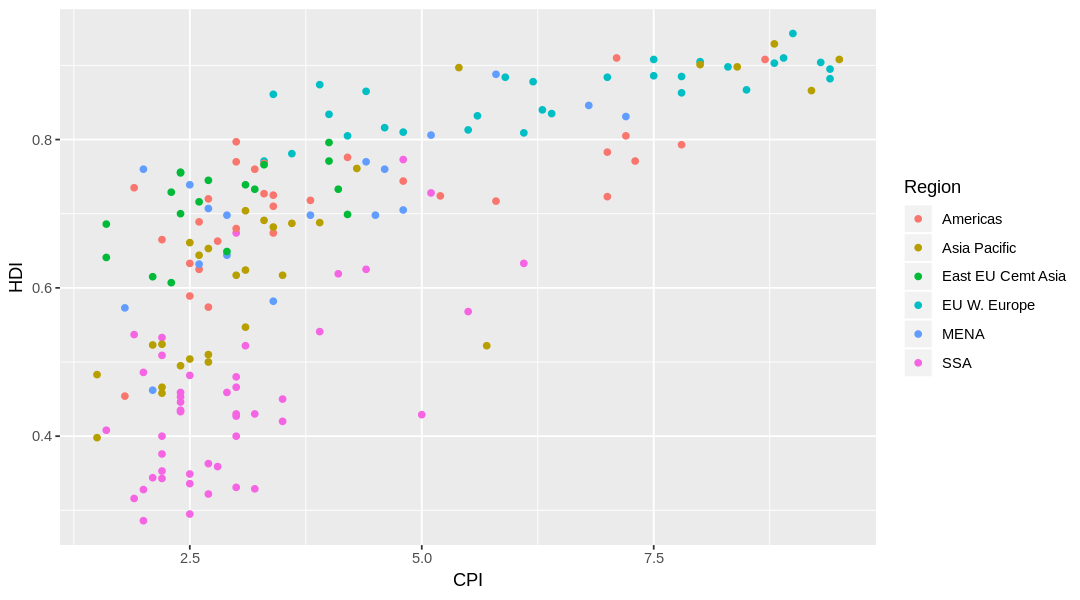

In [ ]:
dat <- read.csv("http://lapso-mx.org/documentos/cursoR/S3/EconomistData.csv", stringsAsFactors = FALSE)
head(dat)
pc1 <- ggplot(dat, aes(x = CPI, y = HDI, color = Region))
pc1 + geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


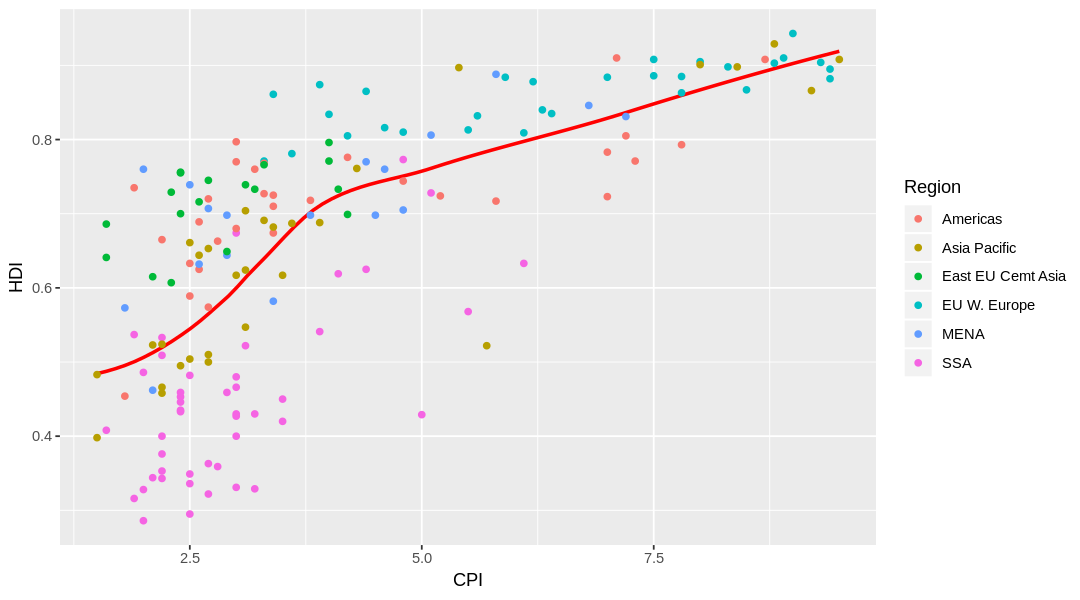

In [ ]:
pc2 <- pc1 +
  geom_smooth(se = FALSE,
              color = "red")
pc2 + geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


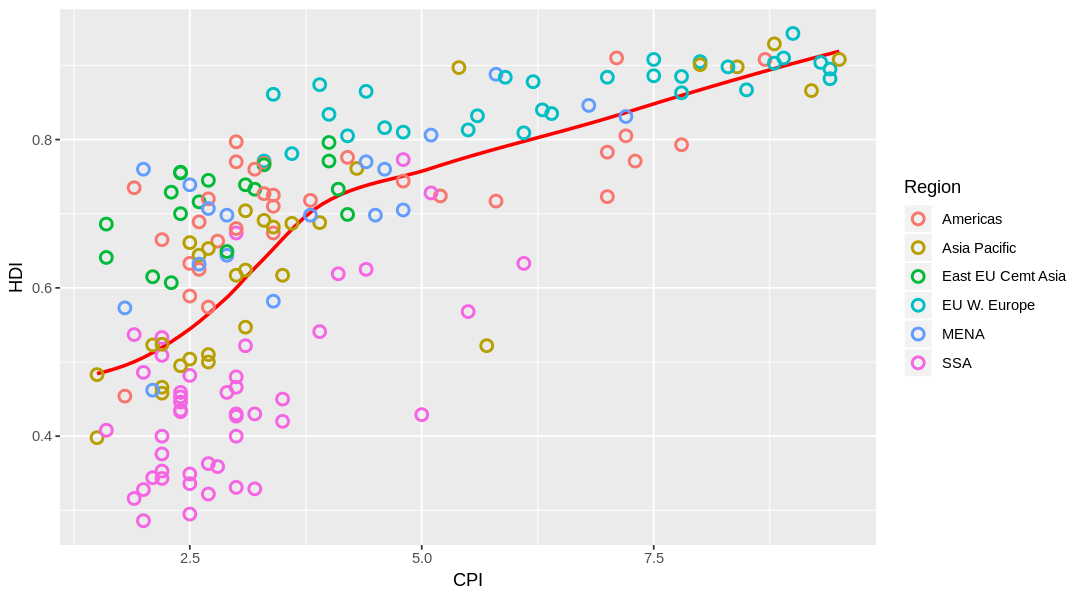

In [ ]:
pc3 <- pc2 + geom_point(shape = 1, size = 2.5, stroke = 1.25)
pc3

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


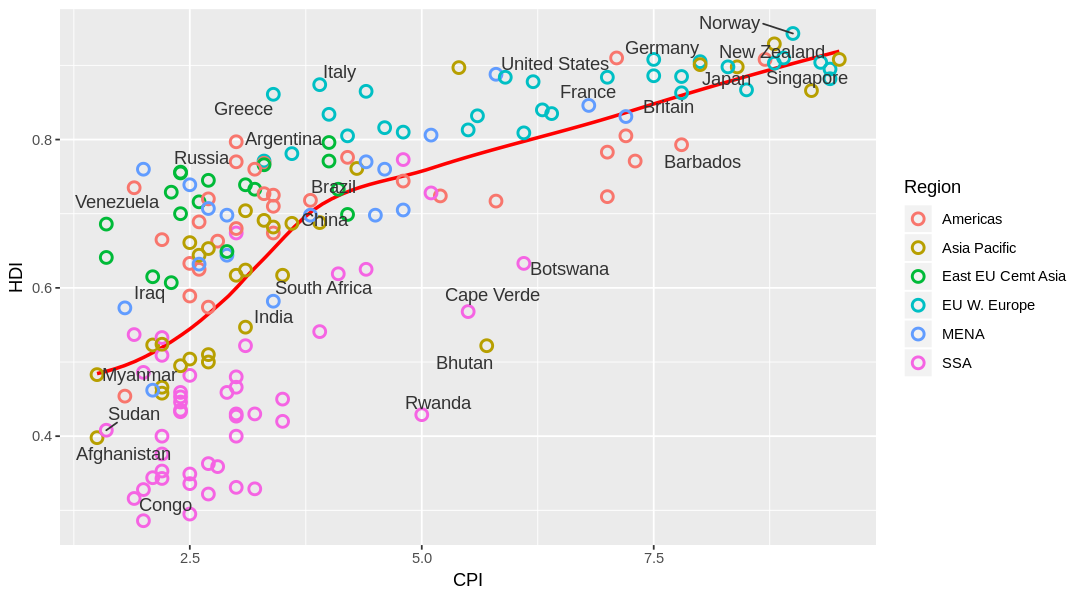

In [ ]:
pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                   "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                   "India", "Italy", "China", "South Africa", "Spane",
                   "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                   "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                   "New Zealand", "Singapore")
install.packages("ggrepel")
library(ggrepel)
pc4 <- pc3 +
  geom_text_repel(aes(label = Country),
                  color = "gray20",
                  data = dplyr::filter(dat, Country %in% pointsToLabel),
                  force=10)
pc4

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


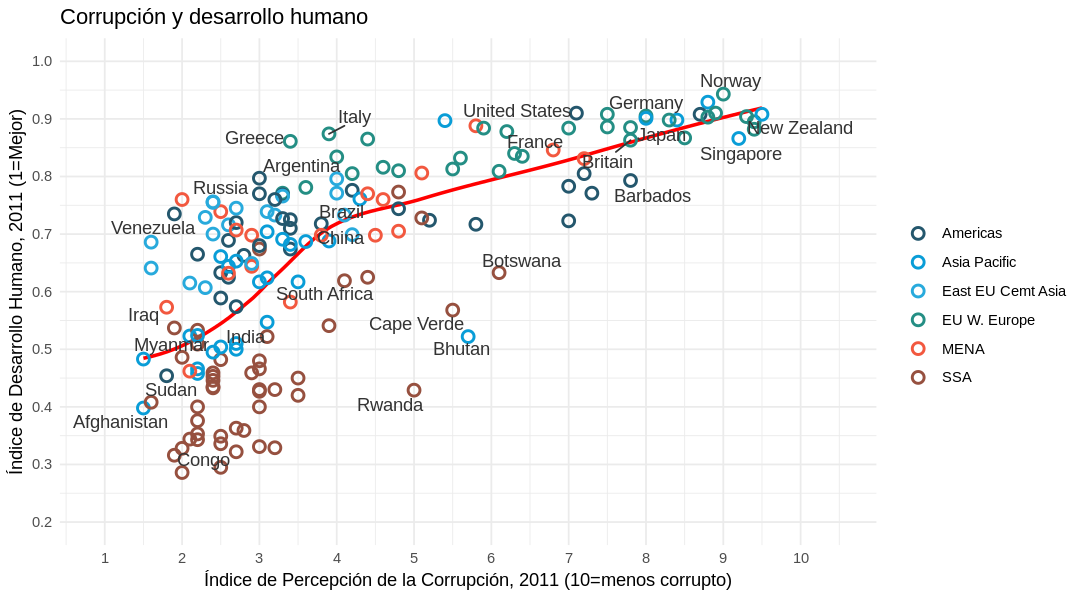

In [ ]:
pc5 <- pc4 +
  scale_x_continuous(name = "Índice de Percepción de la Corrupción, 2011 (10=menos corrupto)",
                     limits = c(.9, 10.5),
                     breaks = 1:10) +
  scale_y_continuous(name = "Índice de Desarrollo Humano, 2011 (1=Mejor)",
                     limits = c(0.2, 1.0),
                     breaks = seq(0.2, 1.0, by = 0.1)) +
  scale_color_manual(name = "",
                     values = c("#24576D",
                                "#099DD7",
                                "#28AADC",
                                "#248E84",
                                "#F2583F",
                                "#96503F")) +
theme_minimal()+
  ggtitle("Corrupción y desarrollo humano")
pc5